In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#have to import descartes here or geopandas oddly can't do it from within jupyter
from descartes.patch import PolygonPatch 


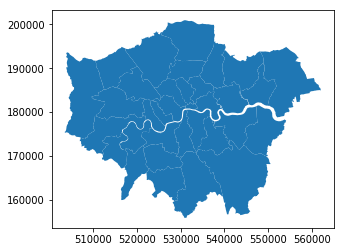

In [2]:
#plot the basic map
fp='/home/sue/Dropbox/Data/testLondonMap/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(fp); #read in data
map_df.plot()

In [3]:
df = pd.read_csv('london-borough-profiles_data.csv', header=0)

df.head()

,Code,New code,Area name,Inner/ Outer London,GLA Population Estimate 2017,GLA Household Estimate 2017,Inland Area (Hectares),Population density (per hectare) 2017,"Average Age, 2017","Proportion of population aged 0-15, 2015",...,Happiness score 2011-14 (out of 10),Anxiety score 2011-14 (out of 10),Childhood Obesity Prevalance (%) 2015/16,People aged 17+ with diabetes (%),Mortality rate from causes considered preventable 2012/14,Political control in council,Proportion of seats won by Conservatives in 2014 election,Proportion of seats won by Labour in 2014 election,Proportion of seats won by Lib Dems in 2014 election,Turnout at 2014 local elections
0,E09000001,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,E09000003,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [4]:
df=df[['Area name','Happiness score 2011-14 (out of 10)','Anxiety score 2011-14 (out of 10)','Population density (per hectare) 2017','Mortality rate from causes considered preventable 2012/14']]


In [5]:
data_for_map = df.rename(index=str,columns={'Happiness score 2011-14 (out of 10)':'happiness', 'Anxiety score 2011-14 (out of 10)':'anxiety','Population density (per hectare) 2017':'pop_density_per_hec','Mortality rate from causes considered preventable 2012/14':'mortality'})

In [6]:
print (map_df)

                      NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Kingston upon Thames  E09000021   3726.117       0.000         F   
1                  Croydon  E09000008   8649.441       0.000         F   
2                  Bromley  E09000006  15013.487       0.000         F   
3                 Hounslow  E09000018   5658.541      60.755         F   
4                   Ealing  E09000009   5554.428       0.000         F   
5                 Havering  E09000016  11445.735     210.763         F   
6               Hillingdon  E09000017  11570.063       0.000         F   
7                   Harrow  E09000015   5046.330       0.000         F   
8                    Brent  E09000005   4323.270       0.000         F   
9                   Barnet  E09000003   8674.837       0.000         F   
10                 Lambeth  E09000022   2724.940      43.927         T   
11               Southwark  E09000028   2991.340     105.139         T   
12                Lewisham  E09000023 

In [7]:
# join the geodataframe with the cleaned up csv dataframe

merged = map_df.set_index('NAME').join(data_for_map.set_index('Area name'))

print(merged[['pop_density_per_hec']])
print(data_for_map[['Area name','pop_density_per_hec']])

                       pop_density_per_hec
NAME                                      
Kingston upon Thames                  47.1
Croydon                               44.7
Bromley                               21.8
Hounslow                              49.0
Ealing                                63.3
Havering                              22.6
Hillingdon                            26.0
Harrow                                50.0
Brent                                 76.8
Barnet                                44.9
Lambeth                              122.7
Southwark                            108.9
Lewisham                              86.3
Greenwich                             59.2
Bexley                                40.3
Enfield                               41.2
Waltham Forest                        71.2
Redbridge                             53.9
Sutton                                46.2
Richmond upon Thames                  34.4
Merton                                55.3
Wandsworth 

In [12]:
#data_for_map.loc[data_for_map['Area name'] == 'City of London', 'pop_density_per_hec'] = 303
#print(data_for_map.iloc[0].pop_density_per_hec)
#merged.at['City of London', 'pop_density_per_hec'] = 303
#merged.pop_density_per_hec = merged.pop_density_per_hec.astype(float)
merged.dtypes

GSS_CODE                object
HECTARES               float64
NONLD_AREA             float64
ONS_INNER               object
SUB_2009                object
SUB_2006                object
geometry                object
happiness              float64
anxiety                float64
pop_density_per_hec     object
mortality               object
dtype: object

In [9]:
print (merged)

                         GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
NAME                                                                          
Kingston upon Thames    E09000021   3726.117       0.000         F     None   
Croydon                 E09000008   8649.441       0.000         F     None   
Bromley                 E09000006  15013.487       0.000         F     None   
Hounslow                E09000018   5658.541      60.755         F     None   
Ealing                  E09000009   5554.428       0.000         F     None   
Havering                E09000016  11445.735     210.763         F     None   
Hillingdon              E09000017  11570.063       0.000         F     None   
Harrow                  E09000015   5046.330       0.000         F     None   
Brent                   E09000005   4323.270       0.000         F     None   
Barnet                  E09000003   8674.837       0.000         F     None   
Lambeth                 E09000022   2724.940      43

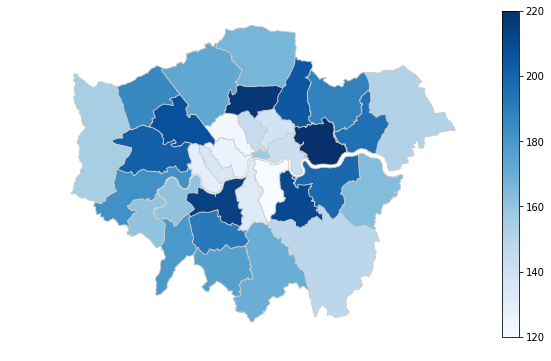

In [10]:
# set a variable that will call whatever column we want to visualise on the map

variable = 'pop_density_per_hec'

# set the range for the choropleth

vmin, vmax = 120, 220

# create figure and axes for Matplotlib

fig, ax = plt.subplots(1, figsize=(10, 6))

# create map

merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range

sm._A = []

# add the colorbar to the figure

cbar = fig.colorbar(sm)